In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
import requests
import wget
import zipfile

plt.rcParams["figure.figsize"] = (8, 6)

# Ignore the warnings.
warnings.filterwarnings('ignore')

The data that we are going to use for this is a subset of an open source Bank Marketing Data Set from the UCI ML repository: https://archive.ics.uci.edu/ml/citation_policy.html.


[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [ ]:
# download zip file using wget func
file = wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip')

In [3]:
# extract zipfile

target = 'bank-additional.zip'
handle = zipfile.ZipFile(target)
handle.extractall('C:\\Users\\WindowsX\\Documents\\Data\\Practice')
handle.close()

In [5]:
# set precision two decimal
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

In [7]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes


In [9]:
# check if there's empty value
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
df.apply(np.max)

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate           1.40
cons.price.idx        94.77
cons.conf.idx        -26.90
euribor3m              5.04
nr.employed         5228.10
y                       yes
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
# View data statistic

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [17]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [19]:
df.sort_values(by=['age'], ascending=False)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38452,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,1,2,2,success,-3.40,92.43,-26.90,0.73,5017.50,yes
38455,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,2,999,0,nonexistent,-3.40,92.43,-26.90,0.73,5017.50,yes
27826,95,retired,divorced,basic.6y,no,no,no,cellular,mar,thu,...,1,999,0,nonexistent,-1.80,92.84,-50.00,1.65,5099.10,no
38921,94,retired,married,basic.9y,no,no,no,cellular,nov,wed,...,1,999,1,failure,-3.40,92.65,-30.10,0.72,5017.50,no
39655,92,retired,married,unknown,no,yes,no,cellular,may,thu,...,1,6,2,success,-1.80,93.88,-40.00,0.68,5008.70,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.90,92.20,-31.40,0.87,5076.20,yes
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.90,92.20,-31.40,0.87,5076.20,no
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.40,92.43,-26.90,0.74,5017.50,yes
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.90,92.20,-31.40,0.88,5076.20,no


In [26]:
# replace Yes and No 'y' with 1 and 0.

Num_val = {'yes':1, 'no':0}
df['y'] = df["y"].apply(lambda x: Num_val[x])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0


## Share of clients attracted in source data

In [44]:
print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 11.3%


## Mean values of numerical features among the attracted clients

In [29]:
df[df["y"] == 1].mean()

age                40.91
duration          553.19
campaign            2.05
pdays             792.04
previous            0.49
emp.var.rate       -1.23
cons.price.idx     93.35
cons.conf.idx     -39.79
euribor3m           2.12
nr.employed      5095.12
y                   1.00
dtype: float64

## Average call duration for the attracted clients?

In [34]:
dur = round(df[df["y"] == 1]["duration"].mean(), 2)
min = dur//60
print('the average call duration for attracted clients is', dur, 'seconds or', min, 'minutes')

the average call duration for attracted clients is 553.19 seconds or 9.0 minutes


## Average age among the attracted and unmarried clients

In [43]:
age = int(df[(df["y"] == 1) & (df["marital"] == "single")]["age"].mean())
print('the average age among attracter and unmaried cliets is', age, "years old")

the average age among attracter and unmaried cliets is 31 years old


## Average age and call duration base on employment types 

In [23]:
df.pivot_table(
    ["age", "duration"],
    ["job"],
    aggfunc = "mean",
).head(12)

,age,duration
job,,
admin.,38.19,254.31
blue-collar,39.56,264.54
entrepreneur,41.72,263.27
housemaid,45.50,250.45
management,42.36,257.06
retired,62.03,273.71
self-employed,39.95,264.14
services,37.93,258.40
student,25.89,283.68


## List 10 clients with the largest number of contacts

In [51]:
df.sort_values(by = "campaign", ascending = False).set_index("campaign").head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
campaign,,,,,,,,,,,,,,,,,,,,
56,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,261,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
43,54,admin.,married,university.degree,unknown,yes,no,cellular,jul,thu,65,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
43,32,technician,single,university.degree,no,yes,yes,telephone,jul,wed,16,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,0
42,29,technician,married,professional.course,no,yes,no,telephone,may,mon,124,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
42,44,retired,married,basic.9y,no,yes,no,telephone,may,fri,147,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
41,38,blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,25,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
40,36,admin.,single,university.degree,no,no,no,cellular,jul,thu,18,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
40,56,self-employed,married,professional.course,no,no,yes,telephone,jun,fri,13,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
39,52,entrepreneur,married,university.degree,no,no,no,telephone,may,mon,44,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0


## Median age and the number of contacts for different levels of client education 

In [54]:
df.pivot_table(
    ["age", "campaign"],
    ["education"],
    aggfunc = ["median"],
)


median         
                       age campaign
education                          
basic.4y                47        2
basic.6y                39        2
basic.9y                38        2
high.school             36        2
illiterate              48        2
professional.course     38        2
university.degree       36        2
unknown                 43        2

## Box plot to analyze the client age distribution by their education level

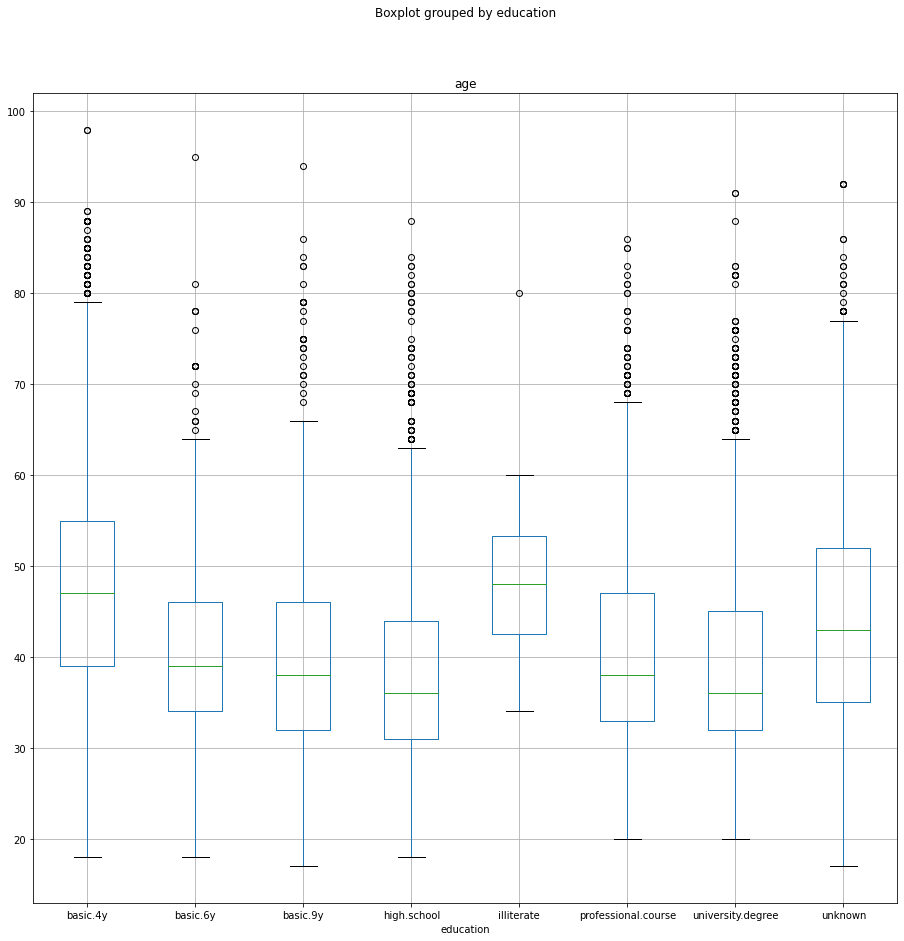

In [57]:
df.boxplot(
    column = "age",
  by = "education",
  figsize = (15, 15)
)
plt.show()